# <p style="background-color: #F4511E; font-family: Times New Roman; color: black; font-size: 140%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>Chronic Kidney Disease Prediction</strong></p>

<p class="author-card" style="border-radius: 25px; overflow: hidden; box-shadow: 0px 4px 20px rgba(0, 0, 0, 0.1); border: 3px solid #27AE60; background-color: #F5F5F5; padding: 30px; transition: transform 0.3s ease; font-family: Georgia; font-style: italic; font-weight: bold; font-size: 38px; text-align: center; background: linear-gradient(90deg, #FF0000, #FF7F00, #FFFF00, #00FF00, #00FFFF, #0000FF, #8B00FF, #FF0000); background-size: 200% 200%; -webkit-background-clip: text; color: transparent; animation: textGradient 10s linear infinite;">If you find my notebook helpful,<br>please consider giving an upvote.</p>

<style>
    p.author-card:hover {
        transform: translateY(-5px);
    }
    @keyframes textGradient {
        0% { background-position: 200% 50%; }
        100% { background-position: 0% 50%; }
    }
</style>

# <p style="background-color: #FDD835; font-family: Times New Roman; color: black; font-size: 120%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>1. Data Loading and Overview</strong></p>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# set the style of matplotlib
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/ckdisease/kidney_disease.csv', index_col='id')
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd


In [3]:
# View the overall information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    object 


In [4]:
# View the description of the dataset
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [5]:
# Check if the dataset has missing values
df.isna().sum().sort_values(ascending=False)

rbc               152
rc                130
wc                105
pot                88
sod                87
pcv                70
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

# <p style="background-color: #FDD835; font-family: Times New Roman; color: black; font-size: 120%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>2. Data Rectification</strong></p>

In [6]:
# Rename columns to make them more readable
col={'age': 'age',
     'bp': 'blood_pressure',
     'sg': 'specific_gravity',
     'al': 'albumin',
     'su': 'sugar',
     'rbc': 'red_blood_cells',
     'pc': 'pus_cell',
     'pcc': 'pus_cell_clumps',
     'ba': 'bacteria',
     'bgr': 'blood_glucose_random',
     'bu': 'blood_urea',
     'sc': 'serum_creatinine',
     'sod': 'sodium',
     'pot': 'potassium',
     'hemo': 'hemoglobin',
     'pcv': 'packed_cell_volume',
     'wc': 'white_blood_cell_count',
     'rc': 'red_blood_cell_count',
     'htn': 'hypertension',
     'dm': 'diabetes_mellitus',
     'cad': 'coronary_artery_disease',
     'appet': 'appetite',
     'pe': 'pedal_edema',
     'ane': 'anemia',
     'classification': 'class'}
df.rename(columns=col, inplace=True)
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd


In [7]:
# View the overall information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               348 no

It can be seen that `packed_cell_volume`, `white_blood_cell_count`, and `red_blood_cell_count` are of object type. These will be converted to numerical type.

In [8]:
# Convert object type to numeric type
df['packed_cell_volume']     = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count']   = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [9]:
# Classify columns: categorical columns and numerical columns
cat_cols = [col for col in df.columns if df[col].dtype=='object']
num_cols = [col for col in df.columns if df[col].dtype!='object']

In [10]:
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedal_edema',
 'anemia',
 'class']

In [11]:
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'hemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [12]:
# View the specific values in the categorical columns
for col in cat_cols:
    print(f'{col} has {df[col].unique()} values\n')

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

pedal_edema has ['no' 'yes' nan] values

anemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [13]:
# View the specific values in the numeric column
for col in num_cols:
    print(f'{col} has {df[col].unique()} values\n')

age has [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.] values

blood_pressure has [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] values

specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025] values

albumin has [ 1.  4.  2.  3.  0. nan  5.] values

sugar has [ 0.  3.  4.  1. nan  2.  5.] values

blood_glucose_random has [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 109. 280. 210. 219. 295.  94. 172.
 101. 298. 153.  88. 226. 143. 115.  89. 

In [14]:
# Replace non-standard values
df['diabetes_mellitus'].replace(to_replace={'\tno':'no',
                                            '\tyes':'yes',
                                            ' yes':'yes'},
                                inplace=True)
df['coronary_artery_disease'].replace(to_replace={'\tno':'no'},
                                      inplace=True)
df['class'].replace(to_replace={'ckd\t':'ckd',
                                'notckd':'not ckd'},
                    inplace=True)

In [15]:
# Convert the 'class' column to binary numeric form (0 and 1)
df['class'] = df['class'].map({'ckd':0, 'not ckd':1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [16]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']
for col in cols:
    print(f'{col} has {df[col].unique()} values\n')

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



# <p style="background-color: #FDD835; font-family: Times New Roman; color: black; font-size: 120%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>3. Exploratory Data Analysis</strong></p>

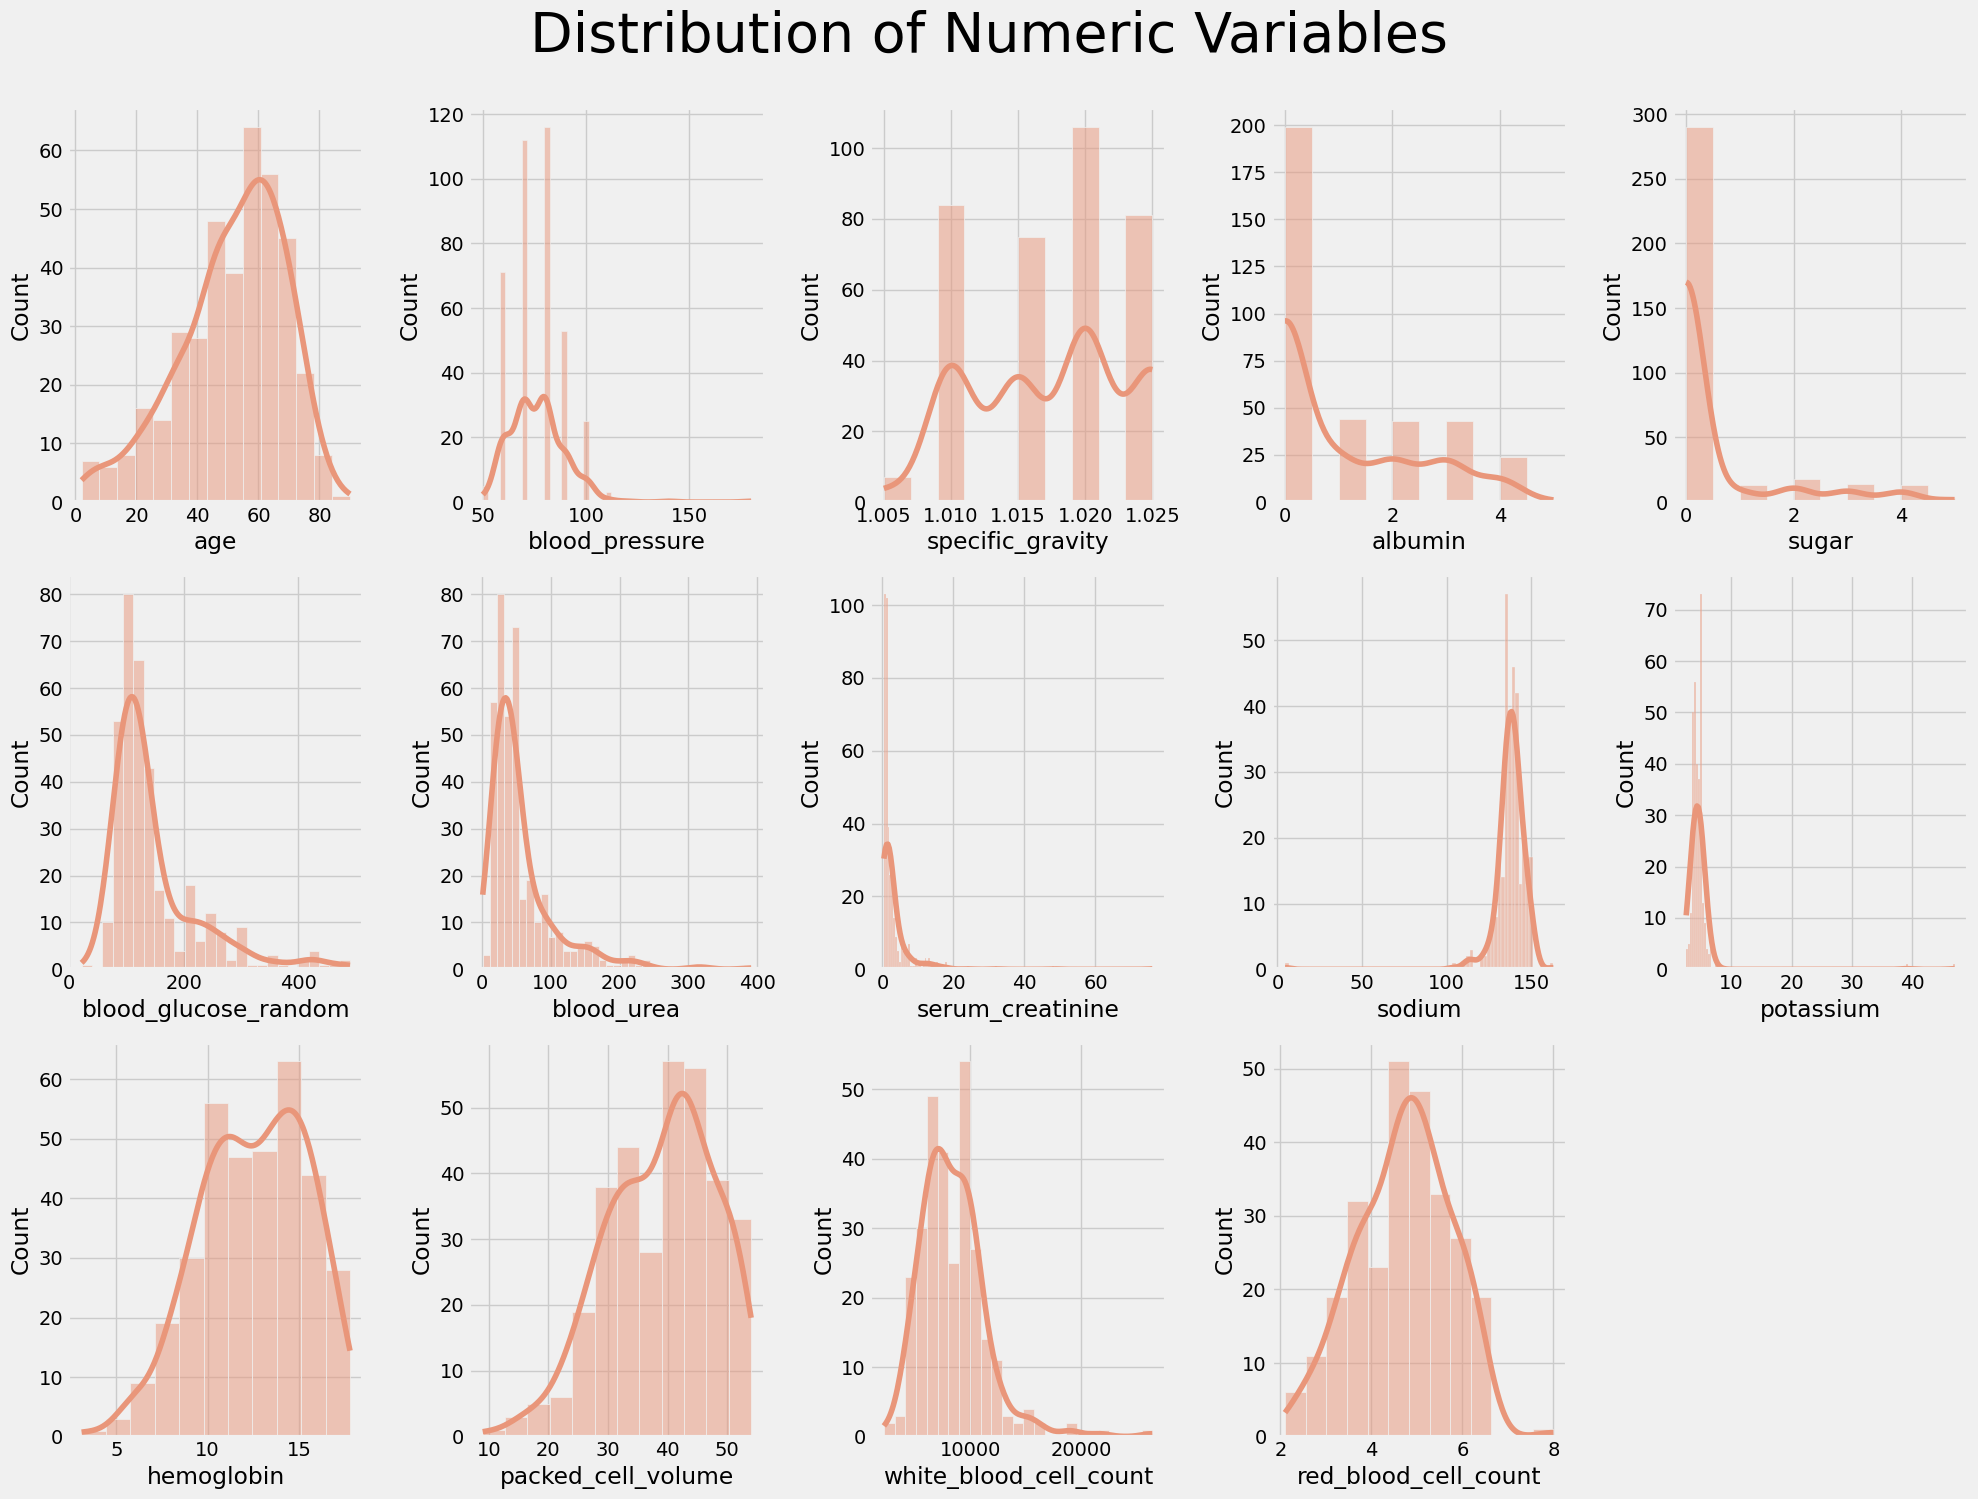

In [17]:
# Distribution of numeric variables
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(df[column], kde=True, color='darksalmon')
        plt.xlabel(column)
        
    plotnumber += 1

plt.suptitle('Distribution of Numeric Variables', fontsize=40, y=1)
plt.tight_layout()
plt.show()

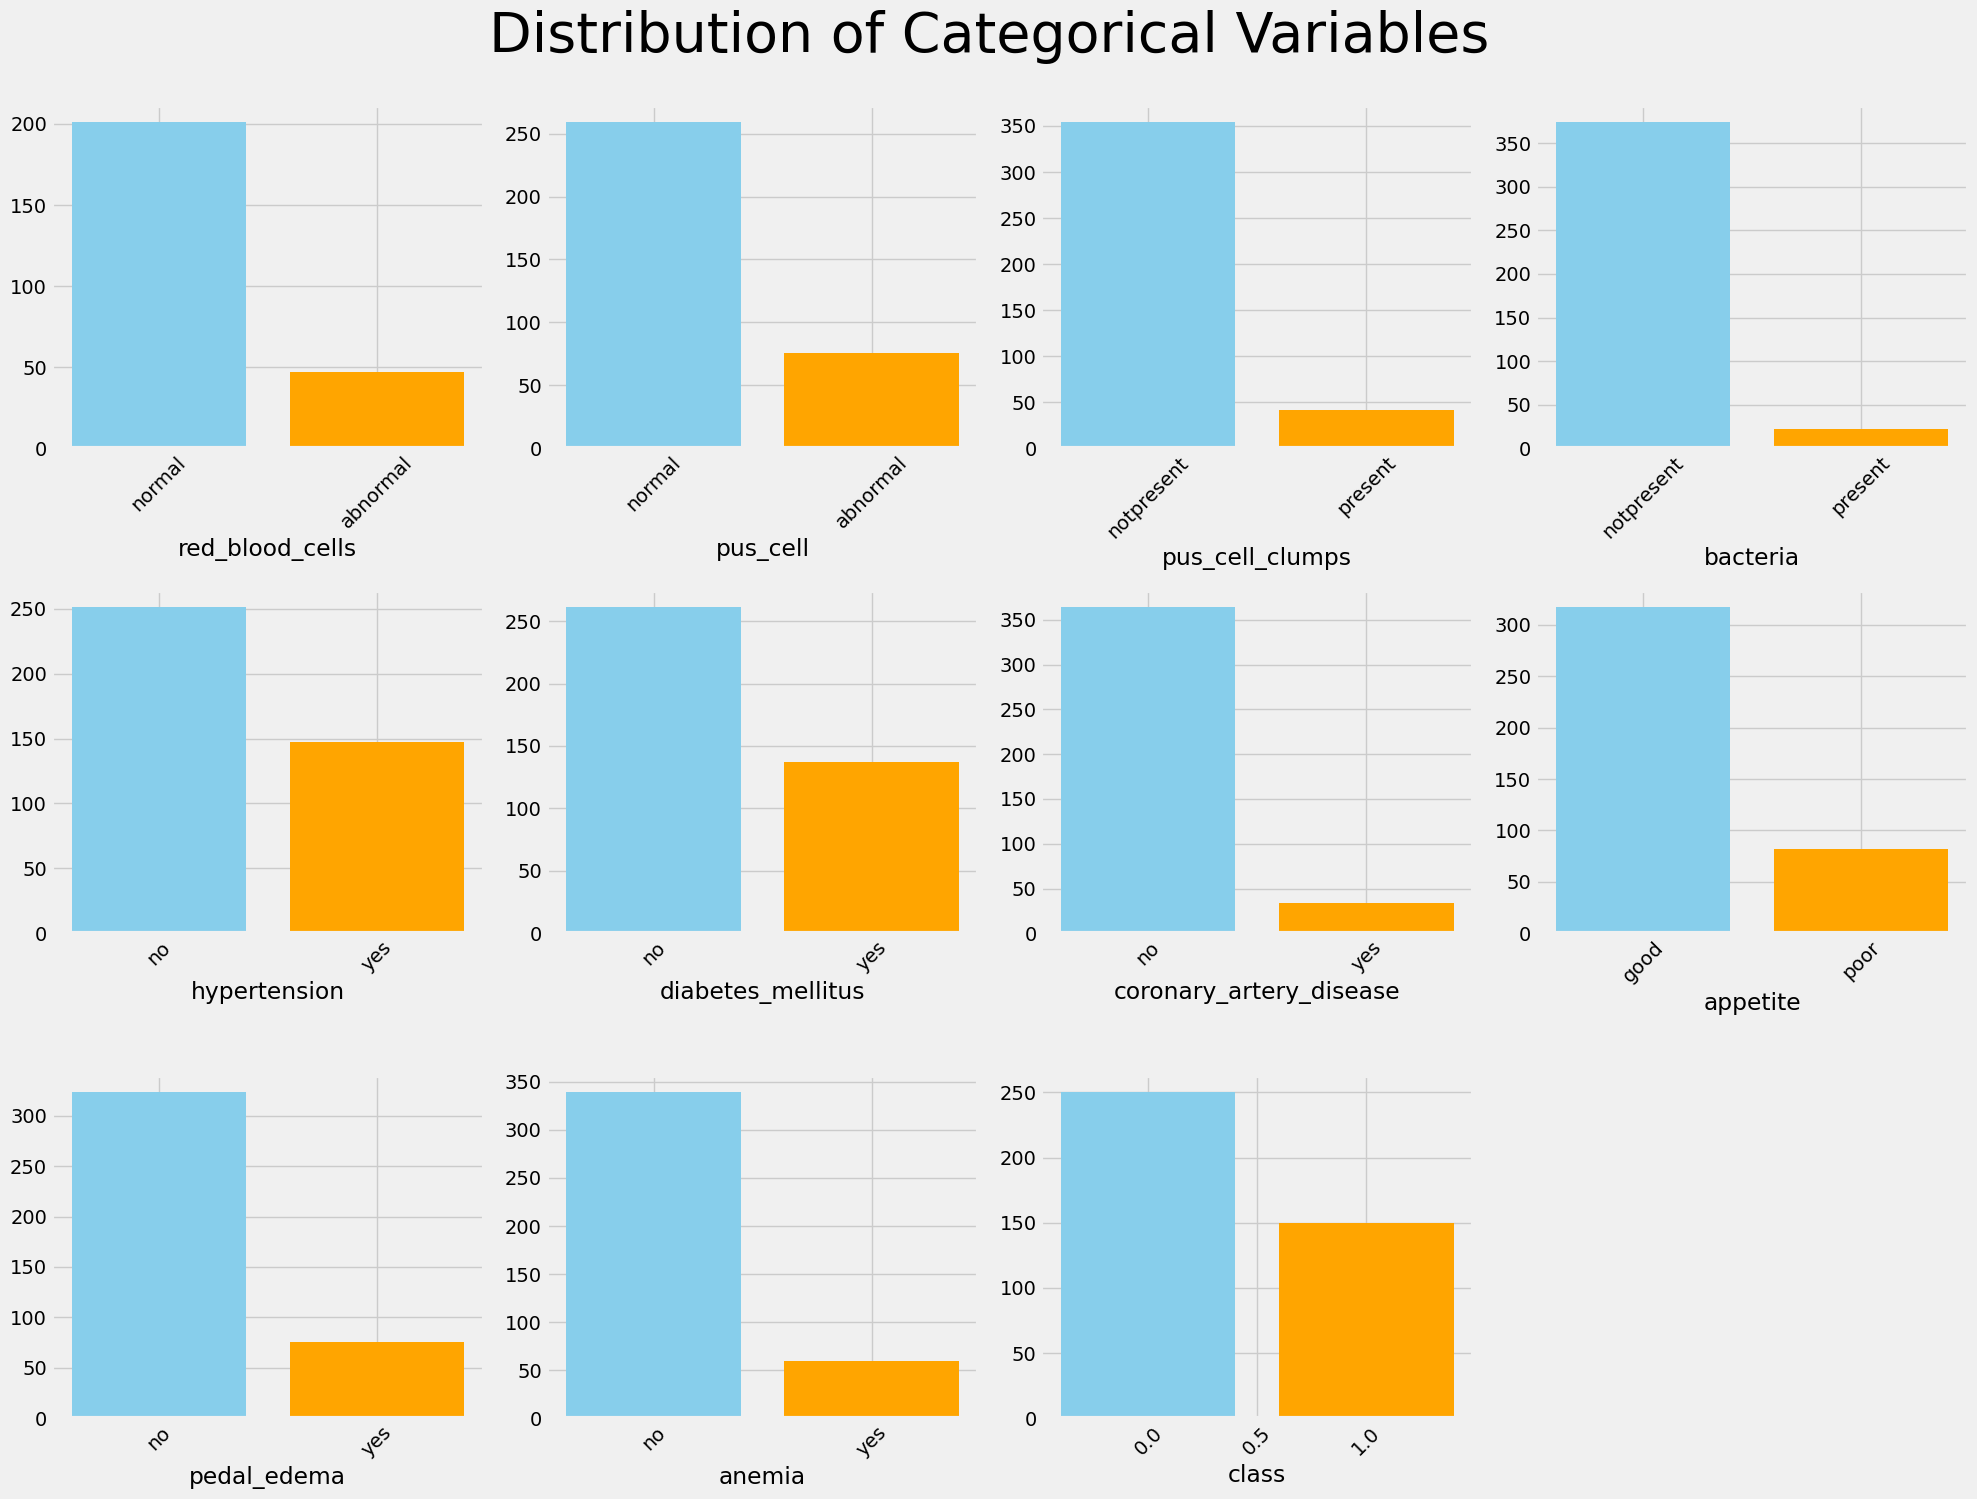

In [18]:
# Distribution of categorical variables
plt.figure(figsize=(20, 15))
plotnumber = 1

colors = ['skyblue', 'orange', 'lightgreen', 'salmon', 'lightcoral', 'cyan', 'pink']

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        # sns.countplot(df[column], palette = 'pastel')
        counts = df[column].value_counts()
        ax.bar(counts.index, counts.values, color=colors[:len(counts)])
        plt.xlabel(column)
        plt.xticks(rotation=45)
        plt.xlabel(column)
        
    plotnumber += 1

plt.suptitle('Distribution of Categorical Variables', fontsize=40, y=1)
plt.tight_layout()
plt.show()

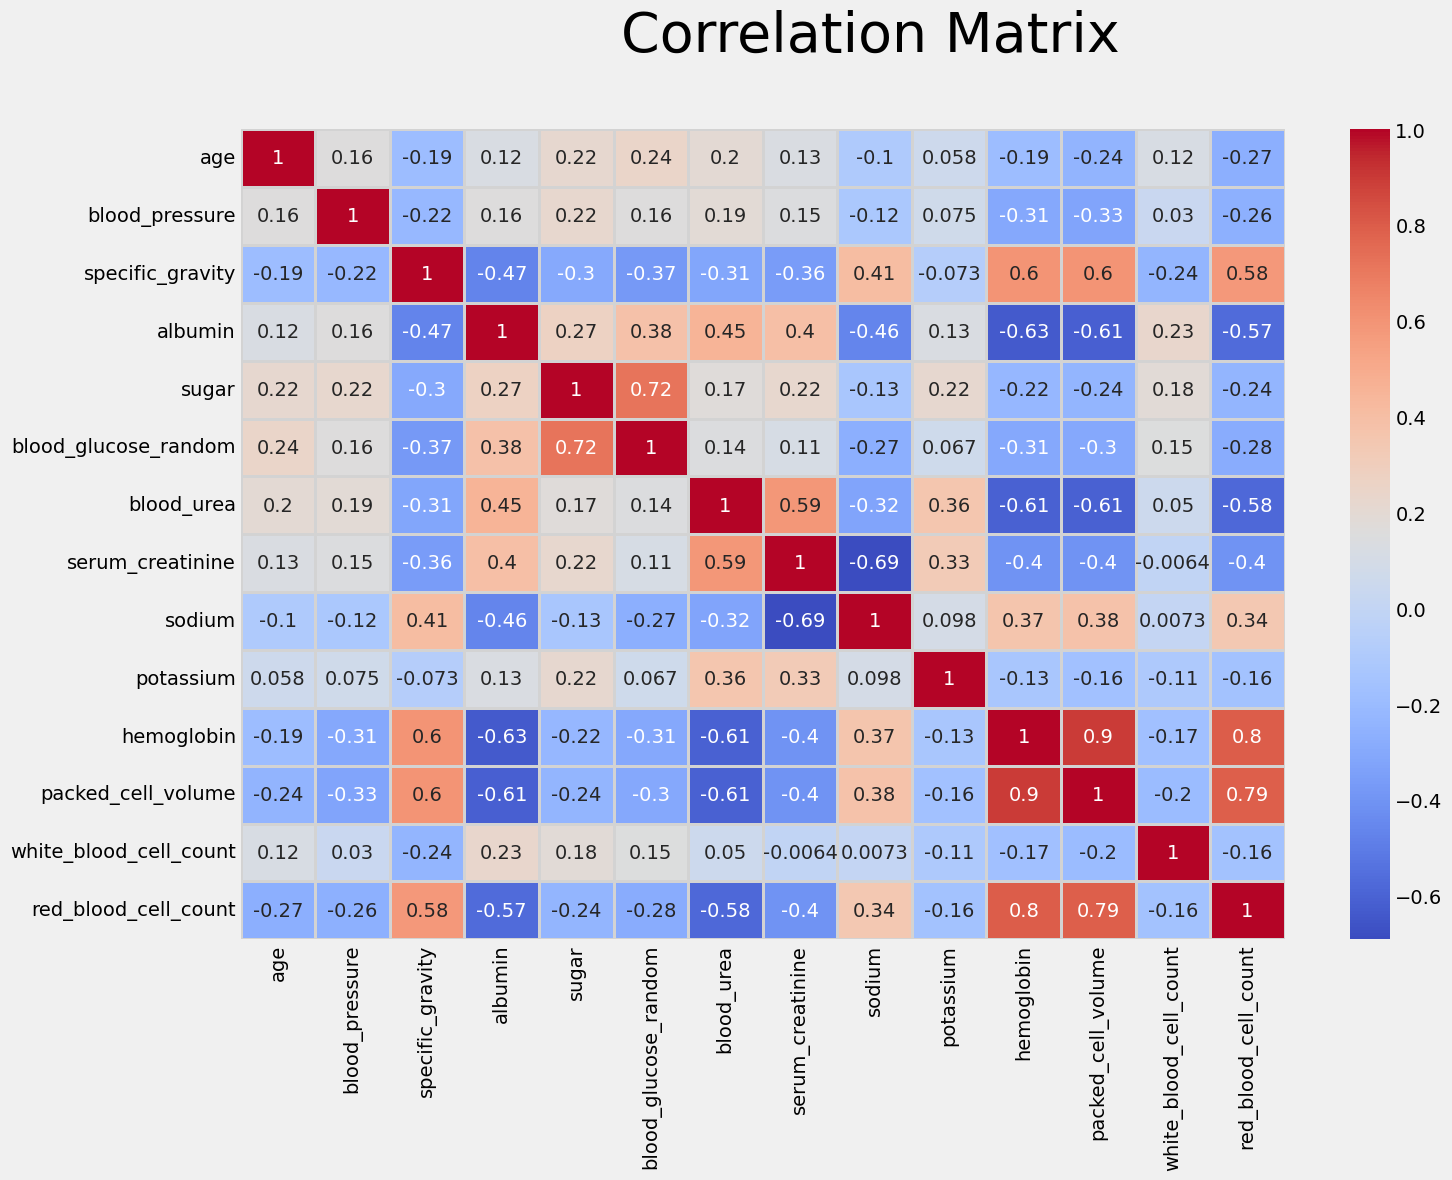

In [19]:
# Correlation matrix of numeric columns
num_df = df[num_cols]

plt.figure(figsize=(15, 10))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', linewidths=2, linecolor='lightgrey')
plt.suptitle('Correlation Matrix', fontsize=40, y=1)
plt.show()

In [20]:
fig = px.violin(df, y='red_blood_cell_count', x="class", color="class",
                box=True, points='all', hover_data=df.columns)
fig.show()

In [21]:
fig = px.violin(df, y='packed_cell_volume', x="class", color="class",
                box=True, points='all', hover_data=df.columns)
fig.show()

In [22]:
fig = px.violin(df, y='hemoglobin', x="class", color="class", box=True,
                points='all', hover_data=df.columns)
fig.show()

In [23]:
fig = px.violin(df, y='serum_creatinine', x="class", color="class", box=True,
                points='all', hover_data=df.columns)
fig.show()

In [24]:
fig = px.scatter(df, x='red_blood_cell_count', y='packed_cell_volume', color="class")
fig.update_layout(width=1000, height=800)
fig.show()

In [25]:
fig = px.scatter(df, x='red_blood_cell_count', y='hemoglobin', color="class")
fig.update_layout(width=1000, height=800)
fig.show()

In [26]:
fig = px.scatter(df, x='hemoglobin', y='packed_cell_volume', color="class")
fig.update_layout(width=1000, height=800)
fig.show()

# <p style="background-color: #FDD835; font-family: Times New Roman; color: black; font-size: 120%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>4. Missing Data Imputation</strong></p>

In [27]:
# View missing values
df.isna().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
hemoglobin                  52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

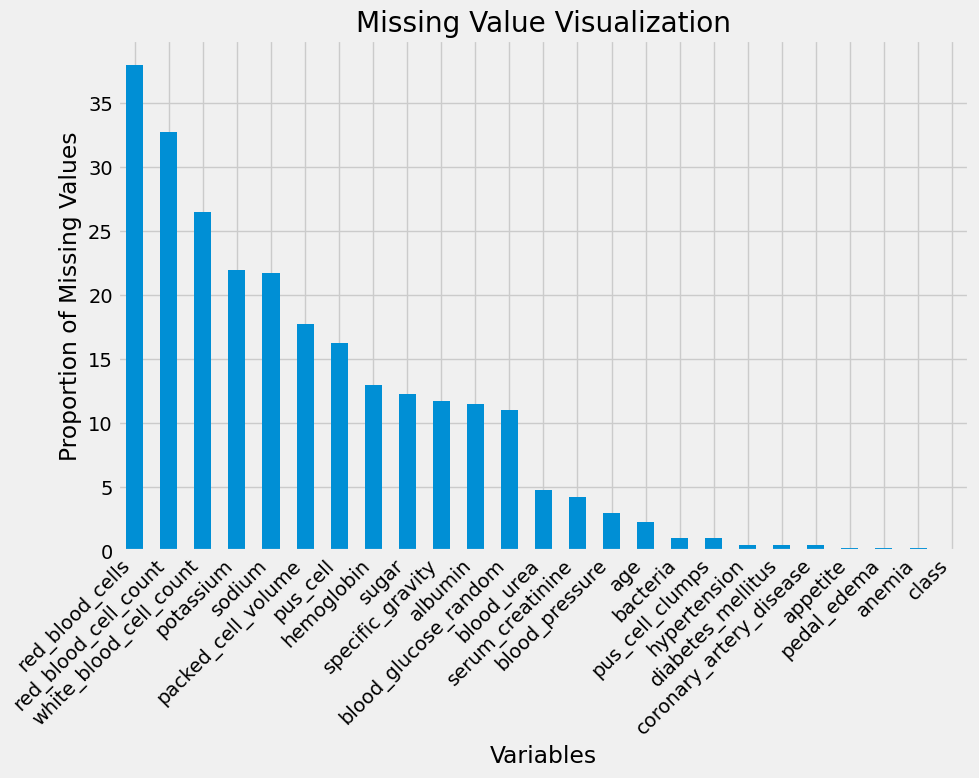

In [28]:
# Visualize missing values
# Count the number of missing values in each column
missing_values = (df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
missing_values.plot(kind='bar')
plt.title('Missing Value Visualization')
plt.xlabel('Variables')
plt.ylabel('Proportion of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [29]:
# Check missing values for numeric columns
df[num_cols].isnull().sum().sort_values(ascending=False)

red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
hemoglobin                 52
sugar                      49
specific_gravity           47
albumin                    46
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
blood_pressure             12
age                         9
dtype: int64

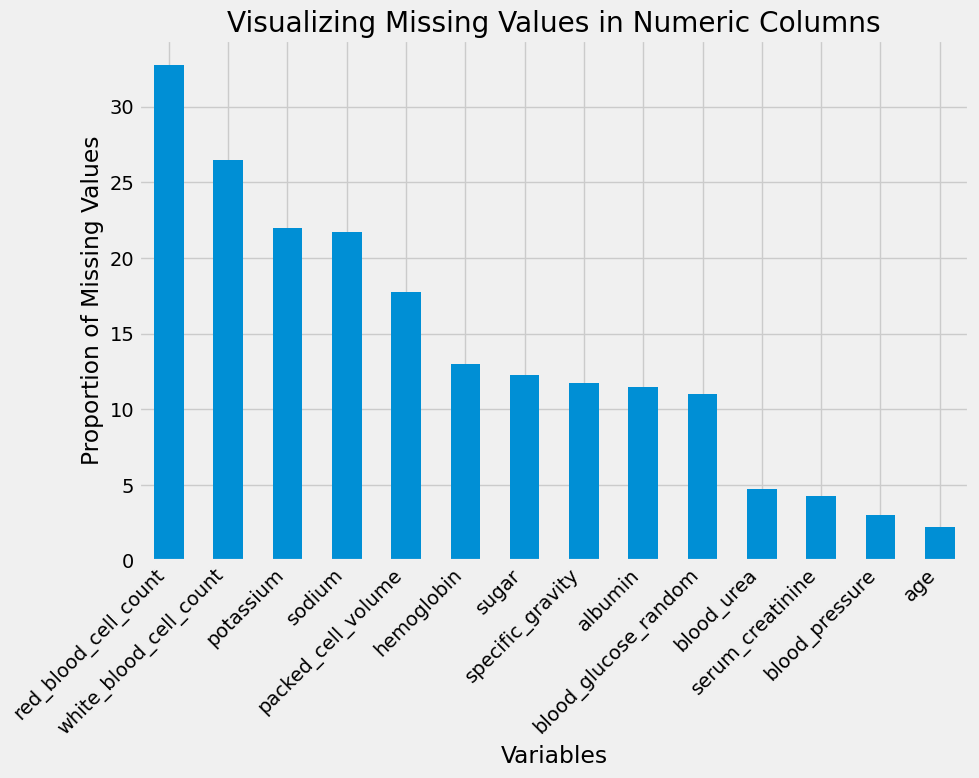

In [30]:
# Visualize missing values in numeric columns
# Count the number of missing values in each column
missing_values = (df[num_cols].isna().sum()/df.shape[0]*100).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
missing_values.plot(kind='bar')
plt.title('Visualizing Missing Values in Numeric Columns')
plt.xlabel('Variables')
plt.ylabel('Proportion of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [31]:
# Check missing values for categorical columns
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

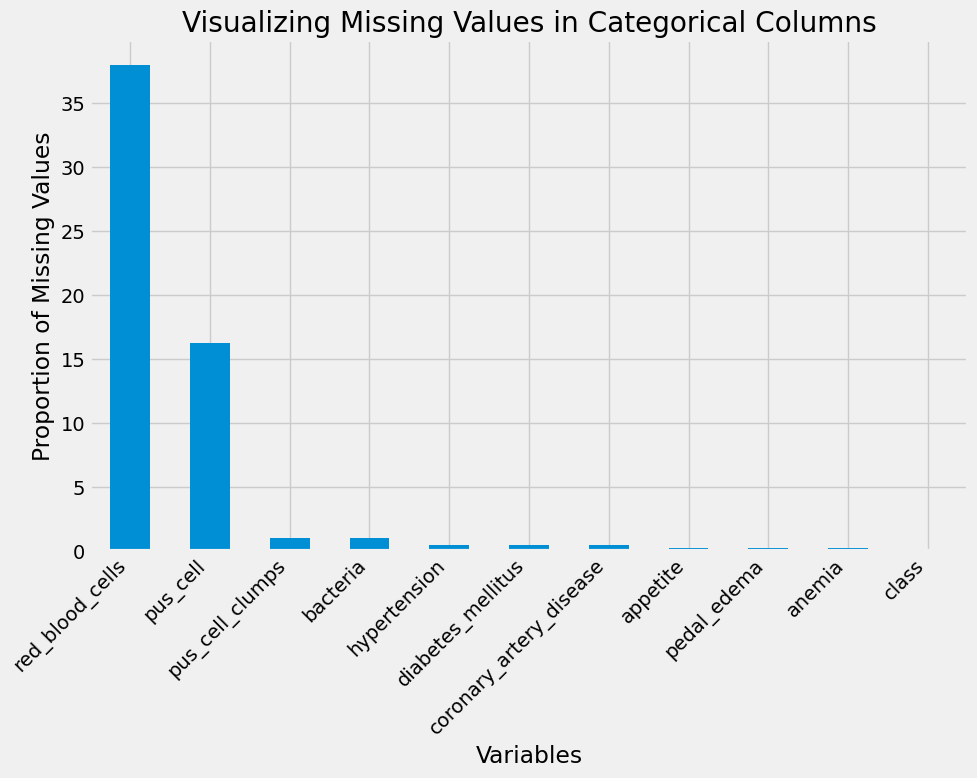

In [32]:
# Visualize missing values in categorical columns
# Count the number of missing values in each column
missing_values = (df[cat_cols].isna().sum()/df.shape[0]*100).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
missing_values.plot(kind='bar')
plt.title('Visualizing Missing Values in Categorical Columns')
plt.xlabel('Variables')
plt.ylabel('Proportion of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [33]:
# Fill missing values in numeric columns
# Multiple iterations of interpolation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Create IterativeImputer object
imputer = IterativeImputer(random_state=0, max_iter=10, sample_posterior=True)
# Use IterativeImputer to fill in missing values
df[num_cols] = imputer.fit_transform(df[num_cols])

In [34]:
# Make sure all missing values have been filled in
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
hemoglobin                0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [35]:
# For feature columns with many missing values: use random values to fill in
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

# For feature columns with relatively few missing values: use the mode to fill in
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)
    
# For the categorical columns red_blood_cells and pus_cell, use random sampling to fill
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

# For other categorical data columns, use the mode to fill
for col in cat_cols:
    impute_mode(col)

In [36]:
# Make sure all missing values have been filled in
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [37]:
# Check the variance inflation factor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add constant term
df_vif = df.copy()
df_vif['const'] = 1

# Select the columns for which VIF needs to be calculated
X = df_vif[num_cols + ['const']]

# Calculate VIF
vif_info = pd.DataFrame()
vif_info['Column'] = X.columns
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info = vif_info.sort_values('VIF', ascending=False)

# Show results
vif_info

,Column,VIF
14,const,41231.054852
10,hemoglobin,5.524807
11,packed_cell_volume,5.148068
7,serum_creatinine,2.973746
8,sodium,2.338351
6,blood_urea,2.296930
13,red_blood_cell_count,2.242119
5,blood_glucose_random,2.193500
4,sugar,2.088330
3,albumin,1.730245


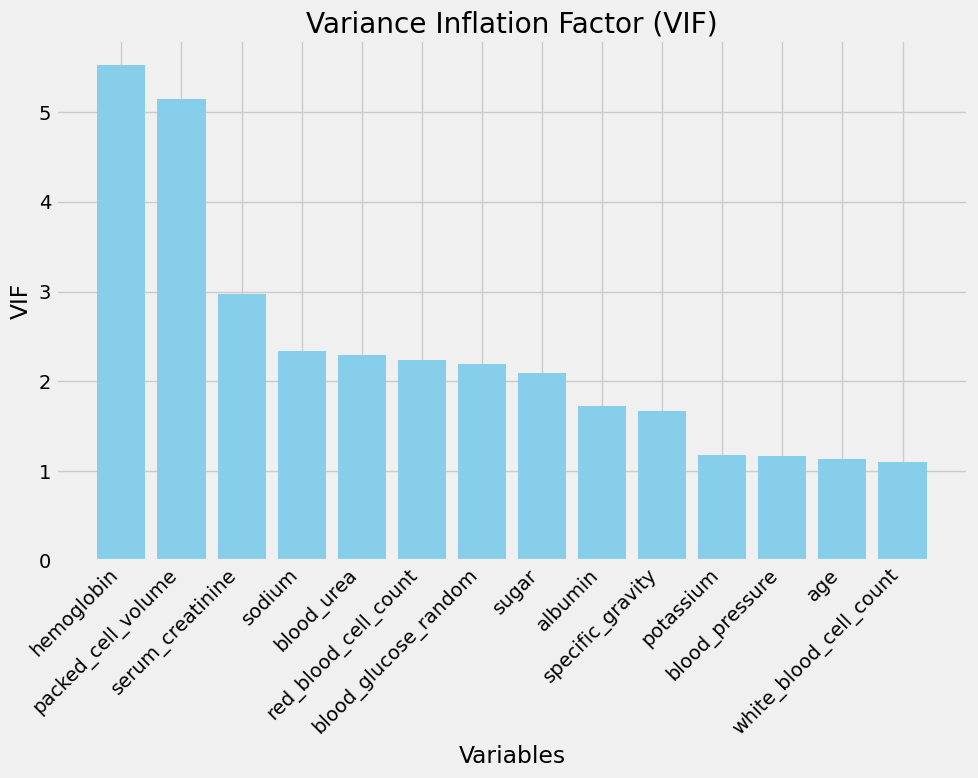

In [38]:
# Result visualization
# Remove const columns
vif_info_filtered = vif_info[vif_info['Column'] != 'const']
vif_info_sorted = vif_info_filtered.sort_values('VIF', ascending=False)

plt.figure(figsize=(10, 8))
plt.bar(vif_info_sorted['Column'], vif_info_sorted['VIF'], color='skyblue')
plt.xlabel('Variables')
plt.ylabel('VIF')
plt.title('Variance Inflation Factor (VIF)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# <p style="background-color: #FDD835; font-family: Times New Roman; color: black; font-size: 120%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>5. Feature Encoding</strong></p>

In [39]:
# Check the number of categories in the category column
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

pedal_edema has 2 categories

anemia has 2 categories

class has 2 categories



In [40]:
# Feature encoding (label encoding)
# Convert categories to numeric values ​​using category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    int64  
 6   pus_cell                 400 non-null    int64  
 7   pus_cell_clumps          400 non-null    int64  
 8   bacteria                 400 non-null    int64  
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  hemoglobin               400 no

# <p style="background-color: #FDD835; font-family: Times New Roman; color: black; font-size: 120%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>6. Modelling</strong></p>

In [42]:
# Prepare training data for the machine learning model
# Define independent variables
ind_col = [col for col in df.columns if col!='class']
# Define dependent variable
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

In [43]:
from sklearn.model_selection import train_test_split

# Divide the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [44]:
from sklearn.preprocessing import StandardScaler

# Features normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>6.1 K-Nearest Neighbors (KNN)</strong></p>

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create KNN classifier
knn = KNeighborsClassifier()
# Train KNN classifier
knn.fit(X_train, y_train)
# Use the trained model for prediction
y_pred = knn.predict(X_test)

print(f'Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}\n')

# Calculate evaluation indicators
knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred, average='macro')
knn_recall = recall_score(y_test, y_pred, average='macro')
knn_f1_score = f1_score(y_test, y_pred, average='macro')

print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Test Accuracy of KNN is {knn_accuracy} \n")
print(f"Test Precision of KNN is {knn_precision} \n")
print(f"Test Recall of KNN is {knn_recall} \n")
print(f"Test F1_score of KNN is {knn_f1_score} \n")
print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

Training Accuracy of KNN is 0.945

Confusion Matrix: 
[[109  19]
 [  0  72]]

Test Accuracy of KNN is 0.905 

Test Precision of KNN is 0.8956043956043955 

Test Recall of KNN is 0.92578125 

Test F1_score of KNN is 0.901633403225389 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.85      0.92       128
           1       0.79      1.00      0.88        72

    accuracy                           0.91       200
   macro avg       0.90      0.93      0.90       200
weighted avg       0.92      0.91      0.91       200



# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>6.2 Gaussian Naive Bayes</strong></p>

In [46]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print(f'Training Accuracy of Gaussian Naive Bayes is {accuracy_score(y_train, gnb.predict(X_train))}\n')

gnb_accuracy = accuracy_score(y_test, y_pred)
gnb_precision = precision_score(y_test, y_pred, average='macro')
gnb_recall = recall_score(y_test, y_pred, average='macro')
gnb_f1_score = f1_score(y_test, y_pred, average='macro')

print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Test Accuracy of Gaussian Naive Bayes is {gnb_accuracy} \n")
print(f"Test Precision of Gaussian Naive Bayes is {gnb_precision} \n")
print(f"Test Recall of Gaussian Naive Bayes is {gnb_recall} \n")
print(f"Test F1_score of Gaussian Naive Bayes is {gnb_f1_score} \n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Training Accuracy of Gaussian Naive Bayes is 0.94

Confusion Matrix: 
[[115  13]
 [  0  72]]

Test Accuracy of Gaussian Naive Bayes is 0.935 

Test Precision of Gaussian Naive Bayes is 0.9235294117647059 

Test Recall of Gaussian Naive Bayes is 0.94921875 

Test F1_score of Gaussian Naive Bayes is 0.931849754921234 

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       128
           1       0.85      1.00      0.92        72

    accuracy                           0.94       200
   macro avg       0.92      0.95      0.93       200
weighted avg       0.94      0.94      0.94       200



# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>6.3 Logistic Regression</strong></p>

In [47]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(f'Training Accuracy of Logistic Regression is {accuracy_score(y_train, logreg.predict(X_train))}\n')

logreg_accuracy = accuracy_score(y_test, y_pred)
logreg_precision = precision_score(y_test, y_pred, average='macro')
logreg_recall = recall_score(y_test, y_pred, average='macro')
logreg_f1_score = f1_score(y_test, y_pred, average='macro')

print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Test Accuracy of Logistic Regression is {logreg_accuracy} \n")
print(f"Test Precision of Logistic Regression is {logreg_precision} \n")
print(f"Test Recall of Logistic Regression is {logreg_recall} \n")
print(f"Test F1_score of Logistic Regression is {logreg_f1_score} \n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Training Accuracy of Logistic Regression is 1.0

Confusion Matrix: 
[[122   6]
 [  0  72]]

Test Accuracy of Logistic Regression is 0.97 

Test Precision of Logistic Regression is 0.9615384615384616 

Test Recall of Logistic Regression is 0.9765625 

Test F1_score of Logistic Regression is 0.968 

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       128
           1       0.92      1.00      0.96        72

    accuracy                           0.97       200
   macro avg       0.96      0.98      0.97       200
weighted avg       0.97      0.97      0.97       200



# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>6.4 Support Vector Machine (SVM)</strong></p>

In [48]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print(f'Training Accuracy of SVM is {accuracy_score(y_train, svm.predict(X_train))}\n')

svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred, average='macro')
svm_recall = recall_score(y_test, y_pred, average='macro')
svm_f1_score = f1_score(y_test, y_pred, average='macro')

print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Test Accuracy of SVM is {svm_accuracy} \n")
print(f"Test Precision of SVM is {svm_precision} \n")
print(f"Test Recall of SVM is {svm_recall} \n")
print(f"Test F1_score of SVM is {svm_f1_score} \n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Training Accuracy of SVM is 0.99

Confusion Matrix: 
[[126   2]
 [  0  72]]

Test Accuracy of SVM is 0.99 

Test Precision of SVM is 0.9864864864864865 

Test Recall of SVM is 0.9921875 

Test F1_score of SVM is 0.9892136770574911 

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       128
           1       0.97      1.00      0.99        72

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>6.5 Decision Tree</strong></p>

In [49]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

print(f'Training Accuracy of Decision Tree is {accuracy_score(y_train, dtree.predict(X_train))}\n')

dtree_accuracy = accuracy_score(y_test, y_pred)
dtree_precision = precision_score(y_test, y_pred, average='macro')
dtree_recall = recall_score(y_test, y_pred, average='macro')
dtree_f1_score = f1_score(y_test, y_pred, average='macro')

print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Test Accuracy of Decision Tree is {dtree_accuracy} \n")
print(f"Test Precision of Decision Tree is {dtree_precision} \n")
print(f"Test Recall of Decision Tree is {dtree_recall} \n")
print(f"Test F1_score of Decision Tree is {dtree_f1_score} \n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Training Accuracy of Decision Tree is 1.0

Confusion Matrix: 
[[123   5]
 [  0  72]]

Test Accuracy of Decision Tree is 0.975 

Test Precision of Decision Tree is 0.9675324675324675 

Test Recall of Decision Tree is 0.98046875 

Test F1_score of Decision Tree is 0.9732613171475173 

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       128
           1       0.94      1.00      0.97        72

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200



# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>6.6 Random Forest</strong></p>

In [50]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print(f'Training Accuracy of Random Forest is {accuracy_score(y_train, rfc.predict(X_train))}\n')

rfc_accuracy = accuracy_score(y_test, y_pred)
rfc_precision = precision_score(y_test, y_pred, average='macro')
rfc_recall = recall_score(y_test, y_pred, average='macro')
rfc_f1_score = f1_score(y_test, y_pred, average='macro')

print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Test Accuracy of Random Forest is {rfc_accuracy} \n")
print(f"Test Precision of Random Forest is {rfc_precision} \n")
print(f"Test Recall of Random Forest is {rfc_recall} \n")
print(f"Test F1_score of Random Forest is {rfc_f1_score} \n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Training Accuracy of Random Forest is 1.0

Confusion Matrix: 
[[127   1]
 [  0  72]]

Test Accuracy of Random Forest is 0.995 

Test Precision of Random Forest is 0.9931506849315068 

Test Recall of Random Forest is 0.99609375 

Test F1_score of Random Forest is 0.9945909398242055 

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       128
           1       0.99      1.00      0.99        72

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>6.7 Extra Trees</strong></p>

In [51]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)

print(f'Training Accuracy of Extra Trees is {accuracy_score(y_train, etc.predict(X_train))}\n')

etc_accuracy = accuracy_score(y_test, y_pred)
etc_precision = precision_score(y_test, y_pred, average='macro')
etc_recall = recall_score(y_test, y_pred, average='macro')
etc_f1_score = f1_score(y_test, y_pred, average='macro')

print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Test Accuracy of Extra Trees is {etc_accuracy} \n")
print(f"Test Precision of Extra Trees is {etc_precision} \n")
print(f"Test Recall of Extra Trees is {etc_recall} \n")
print(f"Test F1_score of Extra Trees is {etc_f1_score} \n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Training Accuracy of Extra Trees is 1.0

Confusion Matrix: 
[[127   1]
 [  0  72]]

Test Accuracy of Extra Trees is 0.995 

Test Precision of Extra Trees is 0.9931506849315068 

Test Recall of Extra Trees is 0.99609375 

Test F1_score of Extra Trees is 0.9945909398242055 

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       128
           1       0.99      1.00      0.99        72

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>6.8 Adaptive Boosting (AdaBoost)</strong></p>

In [52]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

print(f'Training Accuracy of AdaBoost is {accuracy_score(y_train, ada.predict(X_train))}\n')

ada_accuracy = accuracy_score(y_test, y_pred)
ada_precision = precision_score(y_test, y_pred, average='macro')
ada_recall = recall_score(y_test, y_pred, average='macro')
ada_f1_score = f1_score(y_test, y_pred, average='macro')

print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Test Accuracy of AdaBoost is {ada_accuracy} \n")
print(f"Test Precision of AdaBoost is {ada_precision} \n")
print(f"Test Recall of AdaBoost is {ada_recall} \n")
print(f"Test F1_score of AdaBoost is {ada_f1_score} \n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Training Accuracy of AdaBoost is 1.0

Confusion Matrix: 
[[125   3]
 [  0  72]]

Test Accuracy of AdaBoost is 0.985 

Test Precision of AdaBoost is 0.98 

Test Recall of AdaBoost is 0.98828125 

Test F1_score of AdaBoost is 0.9838670646124061 

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       128
           1       0.96      1.00      0.98        72

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200



# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>6.9 Gradient Boosting Machine (GBM)</strong></p>

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)

print(f'Training Accuracy of GBM is {accuracy_score(y_train, gbm.predict(X_train))}\n')

gbm_accuracy = accuracy_score(y_test, y_pred)
gbm_precision = precision_score(y_test, y_pred, average='macro')
gbm_recall = recall_score(y_test, y_pred, average='macro')
gbm_f1_score = f1_score(y_test, y_pred, average='macro')

print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Test Accuracy of GBM is {gbm_accuracy} \n")
print(f"Test Precision of GBM is {gbm_precision} \n")
print(f"Test Recall of GBM is {gbm_recall} \n")
print(f"Test F1_score of GBM is {gbm_f1_score} \n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Training Accuracy of GBM is 1.0

Confusion Matrix: 
[[124   4]
 [  0  72]]

Test Accuracy of GBM is 0.98 

Test Precision of GBM is 0.9736842105263157 

Test Recall of GBM is 0.984375 

Test F1_score of GBM is 0.9785499785499785 

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       128
           1       0.95      1.00      0.97        72

    accuracy                           0.98       200
   macro avg       0.97      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>6.10 Stochastic Gradient Boosting Machine (SGBM)</strong></p>

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a stochastic gradient boosting classifier
sgbm = GradientBoostingClassifier(subsample=0.7)  # Use a subsample ratio of 0.7 to emphasize randomness
sgbm.fit(X_train, y_train)
y_pred = sgbm.predict(X_test)

print(f'Training Accuracy of SGBM is {accuracy_score(y_train, sgbm.predict(X_train))}\n')

sgbm_accuracy = accuracy_score(y_test, y_pred)
sgbm_precision = precision_score(y_test, y_pred, average='macro')
sgbm_recall = recall_score(y_test, y_pred, average='macro')
sgbm_f1_score = f1_score(y_test, y_pred, average='macro')

print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Test Accuracy of SGBM is {sgbm_accuracy} \n")
print(f"Test Precision of SGBM is {sgbm_precision} \n")
print(f"Test Recall of SGBM is {sgbm_recall} \n")
print(f"Test F1_score of SGBM is {sgbm_f1_score} \n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Training Accuracy of SGBM is 1.0

Confusion Matrix: 
[[124   4]
 [  0  72]]

Test Accuracy of SGBM is 0.98 

Test Precision of SGBM is 0.9736842105263157 

Test Recall of SGBM is 0.984375 

Test F1_score of SGBM is 0.9785499785499785 

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       128
           1       0.95      1.00      0.97        72

    accuracy                           0.98       200
   macro avg       0.97      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>6.11 eXtreme Gradient Boosting (XGBoost)</strong></p>

In [55]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print(f'Training Accuracy of XGBoost is {accuracy_score(y_train, xgb.predict(X_train))}\n')

xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_precision = precision_score(y_test, y_pred, average='macro')
xgb_recall = recall_score(y_test, y_pred, average='macro')
xgb_f1_score = f1_score(y_test, y_pred, average='macro')

print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Test Accuracy of XGBoost is {xgb_accuracy} \n")
print(f"Test Precision of XGBoost is {xgb_precision} \n")
print(f"Test Recall of XGBoost is {xgb_recall} \n")
print(f"Test F1_score of XGBoost is {xgb_f1_score} \n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Training Accuracy of XGBoost is 1.0

Confusion Matrix: 
[[124   4]
 [  0  72]]

Test Accuracy of XGBoost is 0.98 

Test Precision of XGBoost is 0.9736842105263157 

Test Recall of XGBoost is 0.984375 

Test F1_score of XGBoost is 0.9785499785499785 

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       128
           1       0.95      1.00      0.97        72

    accuracy                           0.98       200
   macro avg       0.97      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>6.12 Categorical Boosting (CatBoost)</strong></p>

In [56]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(verbose=0)  # verbose=0 is used to reduce the output during training and make the output more concise
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)

print(f'Training Accuracy of CatBoost is {accuracy_score(y_train, cat.predict(X_train))}\n')

cat_accuracy = accuracy_score(y_test, y_pred)
cat_precision = precision_score(y_test, y_pred, average='macro')
cat_recall = recall_score(y_test, y_pred, average='macro')
cat_f1_score = f1_score(y_test, y_pred, average='macro')

print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Test Accuracy of CatBoost is {cat_accuracy} \n")
print(f"Test Precision of CatBoost is {cat_precision} \n")
print(f"Test Recall of CatBoost is {cat_recall} \n")
print(f"Test F1_score of CatBoost is {cat_f1_score} \n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Training Accuracy of CatBoost is 1.0

Confusion Matrix: 
[[123   5]
 [  0  72]]

Test Accuracy of CatBoost is 0.975 

Test Precision of CatBoost is 0.9675324675324675 

Test Recall of CatBoost is 0.98046875 

Test F1_score of CatBoost is 0.9732613171475173 

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       128
           1       0.94      1.00      0.97        72

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200



# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>6.13 Light Gradient Boosting Machine (LightGBM)</strong></p>

In [57]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(verbose=0)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

print(f'Training Accuracy of LGBM is {accuracy_score(y_train, lgbm.predict(X_train))}\n')

lgbm_accuracy = accuracy_score(y_test, y_pred)
lgbm_precision = precision_score(y_test, y_pred, average='macro')
lgbm_recall = recall_score(y_test, y_pred, average='macro')
lgbm_f1_score = f1_score(y_test, y_pred, average='macro')

print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Test Accuracy of LGBM is {lgbm_accuracy} \n")
print(f"Test Precision of LGBM is {lgbm_precision} \n")
print(f"Test Recall of LGBM is {lgbm_recall} \n")
print(f"Test F1_score of LGBM is {lgbm_f1_score} \n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>6.14 Multilayer Perceptron (MLP)</strong></p>

In [58]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print(f'Training Accuracy of MLP is {accuracy_score(y_train, mlp.predict(X_train))}\n')

mlp_accuracy = accuracy_score(y_test, y_pred)
mlp_precision = precision_score(y_test, y_pred, average='macro')
mlp_recall = recall_score(y_test, y_pred, average='macro')
mlp_f1_score = f1_score(y_test, y_pred, average='macro')

print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Test Accuracy of MLP is {mlp_accuracy} \n")
print(f"Test Precision of MLP is {mlp_precision} \n")
print(f"Test Recall of MLP is {mlp_recall} \n")
print(f"Test F1_score of MLP is {mlp_f1_score} \n")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Training Accuracy of MLP is 0.995

Confusion Matrix: 
[[124   4]
 [  0  72]]

Test Accuracy of MLP is 0.98 

Test Precision of MLP is 0.9736842105263157 

Test Recall of MLP is 0.984375 

Test F1_score of MLP is 0.9785499785499785 

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       128
           1       0.95      1.00      0.97        72

    accuracy                           0.98       200
   macro avg       0.97      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>6.15 Model Comparison</strong></p>

In [59]:
accuracy = pd.DataFrame({
    'Model': ['KNN', 'Gaussian Naive Bayes', 'Logistic Regression', 'SVM', 
              'Decision Tree', 'Random Forest', 'Extra Trees', 'AdaBoost', 
              'GBM', 'SGBM', 'XGBoost', 'CatBoost', 'LightGBM', 'MLP'],
    'Score': [knn_accuracy, gnb_accuracy, logreg_accuracy, svm_accuracy, 
              dtree_accuracy, rfc_accuracy, etc_accuracy, ada_accuracy, 
              gbm_accuracy, sgbm_accuracy, xgb_accuracy, cat_accuracy, 
              lgbm_accuracy, mlp_accuracy]
})

accuracy_sorted = accuracy.sort_values(by='Score', ascending=False)
accuracy_sorted

,Model,Score
5,Random Forest,0.995
6,Extra Trees,0.995
3,SVM,0.990
7,AdaBoost,0.985
8,GBM,0.980
9,SGBM,0.980
10,XGBoost,0.980
13,MLP,0.980
4,Decision Tree,0.975
11,CatBoost,0.975


In [60]:
fig = px.bar(data_frame=accuracy_sorted, x='Score', y='Model', color='Score',
             title='Accuracy Comparison', text='Score')
fig.update_layout(width=1000, height=800)
fig.show()

In [61]:
precision = pd.DataFrame({
    'Model': ['KNN', 'Gaussian Naive Bayes', 'Logistic Regression', 'SVM', 
              'Decision Tree', 'Random Forest', 'Extra Trees', 'AdaBoost', 
              'GBM', 'SGBM', 'XGBoost', 'CatBoost', 'LightGBM', 'MLP'],
    'Score': [knn_precision, gnb_precision, logreg_precision, svm_precision, 
              dtree_precision, rfc_precision, etc_precision, ada_precision, 
              gbm_precision, sgbm_precision, xgb_precision, cat_precision, 
              lgbm_precision, mlp_precision]
})

precision_sorted = precision.sort_values(by='Score', ascending=False)
precision_sorted

,Model,Score
5,Random Forest,0.993151
6,Extra Trees,0.993151
3,SVM,0.986486
7,AdaBoost,0.980000
8,GBM,0.973684
9,SGBM,0.973684
10,XGBoost,0.973684
13,MLP,0.973684
4,Decision Tree,0.967532
11,CatBoost,0.967532


In [62]:
fig = px.bar(data_frame = precision_sorted, x='Score', y='Model', color='Score', 
             title='Precision Comparison', text='Score')
fig.update_layout(width=1000, height=800)
fig.show()

In [63]:
recall = pd.DataFrame({
    'Model': ['KNN', 'Gaussian Naive Bayes', 'Logistic Regression', 'SVM', 
              'Decision Tree', 'Random Forest', 'Extra Trees', 'AdaBoost', 
              'GBM', 'SGBM', 'XGBoost', 'CatBoost', 'LightGBM', 'MLP'],
    'Score': [knn_recall, gnb_recall, logreg_recall, svm_recall, dtree_recall, 
              rfc_recall, etc_recall, ada_recall, gbm_recall, sgbm_recall, 
              xgb_recall, cat_recall, lgbm_recall, mlp_recall]
})

recall_sorted = recall.sort_values(by='Score', ascending=False)
recall_sorted

,Model,Score
5,Random Forest,0.996094
6,Extra Trees,0.996094
3,SVM,0.992188
7,AdaBoost,0.988281
8,GBM,0.984375
9,SGBM,0.984375
10,XGBoost,0.984375
13,MLP,0.984375
4,Decision Tree,0.980469
11,CatBoost,0.980469


In [64]:
fig = px.bar(data_frame = recall_sorted, x='Score', y='Model', color='Score', 
             title='Recall Comparison', text='Score')
fig.update_layout(width=1000, height=800)
fig.show()

In [65]:
f1_score = pd.DataFrame({
    'Model': ['KNN', 'Gaussian Naive Bayes', 'Logistic Regression', 'SVM', 
              'Decision Tree', 'Random Forest', 'Extra Trees', 'AdaBoost', 
              'GBM', 'SGBM', 'XGBoost', 'CatBoost', 'LightGBM', 'MLP'],
    'Score': [knn_f1_score, gnb_f1_score, logreg_f1_score, svm_f1_score, 
              dtree_f1_score, rfc_f1_score, etc_f1_score, ada_f1_score, 
              gbm_f1_score, sgbm_f1_score, xgb_f1_score, cat_f1_score, 
              lgbm_f1_score, mlp_f1_score]
})

f1_score_sorted = f1_score.sort_values(by='Score', ascending=False)
f1_score_sorted

,Model,Score
5,Random Forest,0.994591
6,Extra Trees,0.994591
3,SVM,0.989214
7,AdaBoost,0.983867
8,GBM,0.978550
9,SGBM,0.978550
10,XGBoost,0.978550
13,MLP,0.978550
4,Decision Tree,0.973261
11,CatBoost,0.973261


In [66]:
fig = px.bar(data_frame = f1_score_sorted, x='Score', y='Model', color='Score', 
             title='F1_score Comparison', text='Score')
fig.update_layout(width=1000, height=800)
fig.show()